## Setup

In [244]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:
import sys, os

ROOT_PATH = os.path.abspath(os.path.join("..", ".."))
SRC_PATH = os.path.join(ROOT_PATH, "flaresight")
sys.path.insert(0, SRC_PATH)
print(sys.path)

['/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flaresight', '/Users/bensmidt/Documents/miru/flaresight/flar

In [246]:
DOWNLOADS_PATH = os.path.join(os.path.expanduser("~"), "downloads")

In [247]:
import random

# local imports
from data.img import Rect, ROI
from filesys.dir import Dir
from filesys.file import File
from media.image_file import ImageFile

# 3rd party imports
import cv2
import matplotlib.pyplot as plt

## DFire samples images with bounding boxes

In [248]:
dfire_dir_path = os.path.join(DOWNLOADS_PATH, "dfire", "train")
image_dir = Dir(os.path.join(dfire_dir_path, "images"))
img_files = image_dir.get_files()

In [249]:
# sample an image
image_file = ImageFile(random.choice(img_files).get_path())
print(image_file.get_path())
img = image_file.load_img()
label_file = File(
    os.path.join(dfire_dir_path, "labels", "{}.txt".format(
        image_file.get_filename_no_ext()
    ))
)
data = label_file.read()

/Users/bensmidt/downloads/dfire/train/images/WEB04348.jpg


In [250]:
objects = []
for line in data.split("\n"):
    if line:
        labels = line.split(" ")
        labels[1] = float(labels[1])  # x
        labels[2] = float(labels[2])  # y
        labels[3] = float(labels[3])  # w
        labels[4] = float(labels[4])  # h
        rect = Rect()
        rect.set_from_yolo(labels[1:], img.width, img.height)
        roi = ROI(rect, labels[0])
        img.add_roi(roi)

boxed = img.ndarray.copy()
for roi in img.rois:
    print(roi)
    color = (255, 0, 0) if roi.label == "1" else (0, 255, 0)
    boxed = cv2.rectangle(
        boxed,
        (roi.box.x, roi.box.y),
        (roi.box.x + roi.box.width, roi.box.y + roi.box.height),
        color,
        1
    )

1: [x: 7, y: 305, width: 59, height: 41]
1: [x: 128, y: 306, width: 51, height: 43]
1: [x: 266, y: 304, width: 53, height: 40]
1: [x: 380, y: 320, width: 56, height: 41]
1: [x: 572, y: 346, width: 96, height: 64]
0: [x: 6, y: 8, width: 785, height: 421]


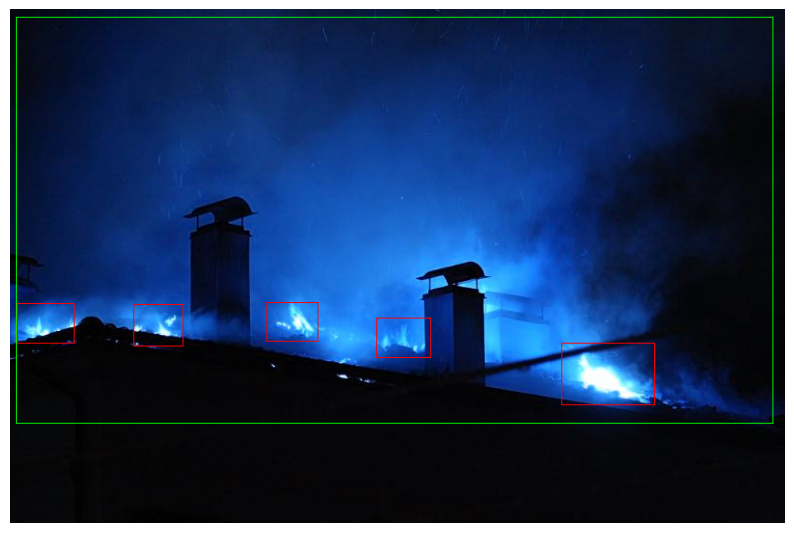

In [251]:
plt.figure(figsize=(10, 10))
plt.imshow(boxed)
plt.axis("off")
plt.show()

## 